### Capstone Project

##### Author: Guntaas Kaur
##### Contact: guntaaskaur1@gmail.com
##### Date: 11-03-2024

## Introduction
<b>Predicting Small Businesses Success & Failure </b><br>
Understanding the Reasons Behind Small Business Failures and Leveraging Machine Learning for Enhanced Success

Data Dictionary
| Data         | Field        | Description                                      |
|--------------|--------------|--------------------------------------------------|
| Businesses   | Business ID  | Unique identifier for each business.             |
|              | Name         | Name of the business.                            |
|              | Address      | Address of the business.                         |
|              | City         | The city where the business is located.          |
|              | State        | State where the business is located.             |
|              | Postal Code  | Postal code of the business.                     |
|              | Latitude     | Latitude coordinates of the business location.   |
|              | Longitude    | Longitude coordinate of the business location.   |
|              | Stars        | Average rating of the business.                  |
|              | Review Count | Number of reviews the business has received.     |
|              | Is Open      | Indicates if the business is currently open (1 for open, 0 for closed). |
|              | Attributes   | Additional attributes or features of the business. |
|              | Categories   | Categories or types of services offered by the business. |
|              | Hours        | Operating hours of the business.                 |
| Reviews      | Review ID    | Unique identifier for each review.               |
|              | User ID      | Unique identifier for the user who wrote the review. |
|              | Business ID  | Unique identifier for the business being reviewed. |
|              | Stars        | Rating given by the user (1 to 5 stars).         |
|              | Text         | The text content of the review.                  |
|              | Date         | The date when the review was written.            |
| Users        | User ID      | Unique identifier for each user.                 |
|              | Name         | User's name.                                     |
|              | Review Count | Number of reviews written by the user.           |
|              | Average Stars| Average rating given by the user.                |
|              | Yelper Since | Date when the user joined Yelp.                  |
| Tips         | User ID      | Unique identifier for the user who wrote the tip. |
|              | Business ID  | Unique identifier for the business the tip is about. |
|              | Text         | The text content of the tip.                     |
|              | Date         | The date when the tip was written.               |
| Checkin      | Business_id  | Unique identifier for each business.             |
|              | Date         | Timestamps indicating the dates and times associated with checkins on business.|



<b>Target: Is_open<b>

---
### <a id="BasicAnalysis"> Part 1 Basic Analysis</a>
---

In [1]:
#importing required libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
businesses = pd.read_json("data/yelp_academic_dataset_business.json", lines=True, orient='columns', chunksize=150243)

# read the data 
for business in businesses:
    df_business = business
    break

In [ ]:
users = pd.read_json('data/yelp_academic_dataset_user.json', lines = True, chunksize = 5000000)
    
for user in users:
   df_user = user
   break

In [7]:
print("Business :",df_business.shape)
print("Review :",df_review.shape)
#print("User :",df_user.shape)
print("Checkin :",df_checkin.shape)

Business : (150243, 14)
Review : (10000, 9)
Checkin : (10000, 2)


In [8]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150243 entries, 0 to 150242
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150243 non-null  object 
 1   name          150243 non-null  object 
 2   address       150243 non-null  object 
 3   city          150243 non-null  object 
 4   state         150243 non-null  object 
 5   postal_code   150243 non-null  object 
 6   latitude      150243 non-null  float64
 7   longitude     150243 non-null  float64
 8   stars         150243 non-null  float64
 9   review_count  150243 non-null  int64  
 10  is_open       150243 non-null  int64  
 11  attributes    136507 non-null  object 
 12  categories    150140 non-null  object 
 13  hours         127038 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.0+ MB


<b>Flattening Nested Structures:</b>
The dataset contains nested dictionaries and JSON-like structures, had to flatten them into string representations to create flat feature vectors suitable for modeling.
First, we will convert hours to string then extract day and time, later we will convert time to timestamp.

In [9]:
one_row = df_business.iloc[1]

print(one_row)

business_id                                mpf3x-BjTdTEA3yCZrAYPw
name                                                The UPS Store
address                           87 Grasso Plaza Shopping Center
city                                                       Affton
state                                                          MO
postal_code                                                 63123
latitude                                                38.551126
longitude                                              -90.335695
stars                                                         3.0
review_count                                                   15
is_open                                                         1
attributes                 {'BusinessAcceptsCreditCards': 'True'}
categories      Shipping Centers, Local Services, Notaries, Ma...
hours           {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...
Name: 1, dtype: object


<b>Size and Structure: 
    The DataFrame contains 150,346 rows and 16 columns(after feature engineering).

Data Types: 
    The columns contain a mix of data types:

3 columns are of type float64.
2 columns are of type int64.
9 columns are of type object (likely strings).
Missing Values: Some columns have missing values:

The 'attributes','categories' and 'hours' column has missing values.

In [10]:
df_business.head().T

,0,1,2,3,4
business_id,Pns2l4eNsfO8kk83dixA6A,mpf3x-BjTdTEA3yCZrAYPw,tUFrWirKiKi_TAnsVWINQQ,MTSW4McQd7CbVtyjqoe9mw,mWMc6_wTdE0EUBKIGXDVfA
name,"Abby Rappoport, LAC, CMQ",The UPS Store,Target,St Honore Pastries,Perkiomen Valley Brewery
address,"1616 Chapala St, Ste 2",87 Grasso Plaza Shopping Center,5255 E Broadway Blvd,935 Race St,101 Walnut St
city,Santa Barbara,Affton,Tucson,Philadelphia,Green Lane
state,CA,MO,AZ,PA,PA
postal_code,93101,63123,85711,19107,18054
latitude,34.426679,38.551126,32.223236,39.955505,40.338183
longitude,-119.711197,-90.335695,-110.880452,-75.155564,-75.471659
stars,5.0,3.0,3.5,4.0,4.5
review_count,7,15,22,80,13


In [11]:
# Filter the DataFrame based on the count of occurrences of each unique value in the 'name' column
df_business = df_business[df_business['name'].map(df_business['name'].value_counts()) < 2]
df_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,FL,33707,27.766590,-82.732983,3.5,5,1,None,"Synagogues, Religious Organizations","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150238,Oy8MfKjNpv3uKs6tCgCVVw,Petrucci's Dairy Barn,2863 Knights Rd,Bensalem,PA,19020,40.103088,-74.951998,4.0,25,1,"{'BusinessAcceptsCreditCards': 'False', 'Busin...","Ice Cream & Frozen Yogurt, Food","{'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'..."
150239,TSwMwVq5GtQh5LW2t32uGA,Woody's Roundup Bar & Grill,"Earl Warren Showgrounds, 3400 Calle Real",Santa Barbara,CA,93105,34.430895,-119.735645,2.0,6,0,"{'Caters': 'True', 'BusinessParking': '{'garag...","Barbeque, Bars, Restaurants, Nightlife",None
150240,gem2iNVMy6qhNDO_pO4IqA,Sweet L's Bakery,26 Hibiscus St,Tarpon Springs,FL,34689,28.147221,-82.756020,5.0,10,0,"{'BikeParking': 'False', 'BusinessParking': '{...","Desserts, Food, Bakeries","{'Monday': '0:0-0:0', 'Wednesday': '11:0-16:0'..."
150241,XjvaFqjMoU80yO2LpsYqEA,Washoe Lake State Park,County Road 101,New Washoe City,NV,89704,39.321013,-119.796692,4.0,6,1,"{'BusinessParking': '{'garage': False, 'street...","Active Life, Parks",None


In [12]:
# Reset the index of the DataFrame
df_business.reset_index(drop=True, inplace=True)

In [13]:
df_business['state'].value_counts()

state
PA     25054
FL     18587
TN      8285
LA      7419
MO      7250
IN      7097
AZ      6759
NJ      5826
NV      5797
CA      4315
AB      3733
ID      3101
DE      1513
IL      1313
TX         4
CO         3
HI         2
WA         1
UT         1
MT         1
MI         1
SD         1
XMS        1
MA         1
VI         1
VT         1
Name: count, dtype: int64

PA: Pennsylvania
FL: Florida
TN: Tennessee
IN: Indiana
MO: Missouri
LA: Louisiana
AZ: Arizona
NJ: New Jersey
NV: Nevada
AB: Alberta (This is a Canadian province, not a U.S. state)
CA: California
ID: Idaho
DE: Delaware
IL: Illinois
TX: Texas
CO: Colorado
WA: Washington
HI: Hawaii
MA: Massachusetts
NC: North Carolina
UT: Utah
MT: Montana
MI: Michigan
SD: South Dakota
XMS: This abbreviation is not recognized as a U.S. state or Canadian province abbreviation.
VI: Virgin Islands (This is a territory of the United States, not a state)
VT: Vermont

In [14]:
df_business_subset=df_business.drop(columns=['attributes','categories','hours'])

In [15]:
df_business_subset.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1
2,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1
3,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,FL,33707,27.766590,-82.732983,3.5,5,1
4,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0


### Removing Duplicates

In [16]:
df_business_subset.duplicated().sum()

0

Empty dataset specifies that there are no duplicate values in specified columns

In [17]:
df_business_subset.isna().sum()

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
dtype: int64

### Removing Null Values

In [18]:
# Count occurrences of categories starting with 'rest'
# Convert strings in the 'categories' column to lowercase
df_business['categories'] = df_business['categories'].str.lower()

rest_categories_count = df_business['categories'].str.contains('rest.*', regex=True)

# Print the result
print(rest_categories_count)

0         False
1          True
2         False
3         False
4          True
          ...  
106062    False
106063     True
106064    False
106065    False
106066    False
Name: categories, Length: 106067, dtype: object


/var/folders/rc/713vct4s6wg859ww_2h0w03w0000gn/T/ipykernel_29082/3314344087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business['categories'] = df_business['categories'].str.lower()


In [19]:
# Print unique categories
print(df_business['categories'].unique())


['doctors, traditional chinese medicine, naturopathic/holistic, acupuncture, health & medical, nutritionists'
 'restaurants, food, bubble tea, coffee & tea, bakeries'
 'brewpubs, breweries, food' ... 'restaurants, pizza, mexican'
 'barbeque, bars, restaurants, nightlife'
 'shopping, home & garden, home decor, home services, paint stores, painters, contractors']


In [20]:
# Print unique categories
print(df_business['categories'].unique())


['doctors, traditional chinese medicine, naturopathic/holistic, acupuncture, health & medical, nutritionists'
 'restaurants, food, bubble tea, coffee & tea, bakeries'
 'brewpubs, breweries, food' ... 'restaurants, pizza, mexican'
 'barbeque, bars, restaurants, nightlife'
 'shopping, home & garden, home decor, home services, paint stores, painters, contractors']


In [21]:
df_business['categories'].isna().sum()

90

In [22]:
df_business['categories'].isna().mean()*100

0.08485202749205692

The percentage of null for categories is much smaller. For the <3% missing columns so we can remove those rows.

In [23]:
df_business.dropna(subset=['categories'], inplace=True)


/var/folders/rc/713vct4s6wg859ww_2h0w03w0000gn/T/ipykernel_29082/902887265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business.dropna(subset=['categories'], inplace=True)


In [24]:
df_business['categories'].isna().sum()

0

For the attributes, hours columns it may be worth imputing these values as dropping 15.37% and 9.02% of rows may be too much data loss.

In [25]:
#making everything lower case + remove punctuation
df_business['address'] = df_business['address'].str.lower()

df_business['address'] = df_business['address'].str.replace('[^\w\s]','')

/var/folders/rc/713vct4s6wg859ww_2h0w03w0000gn/T/ipykernel_29082/2588515633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business['address'] = df_business['address'].str.lower()
/var/folders/rc/713vct4s6wg859ww_2h0w03w0000gn/T/ipykernel_29082/2588515633.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business['address'] = df_business['address'].str.replace('[^\w\s]','')


In [26]:
df_business['address'].head(10)

0    1616 chapala st, ste 2
1               935 race st
2             101 walnut st
3        400 pasadena ave s
4         8025 mackenzie rd
5                          
6         15 n missouri ave
7             2575 e bay dr
8               205 race st
9           625 n stone ave
Name: address, dtype: object

In [27]:
df_business=df_business.dropna(subset=['categories',],axis=0)

### Hours

In [28]:
df_business.isna().mean()*100

business_id      0.000000
name             0.000000
address          0.000000
city             0.000000
state            0.000000
postal_code      0.000000
latitude         0.000000
longitude        0.000000
stars            0.000000
review_count     0.000000
is_open          0.000000
attributes       9.751172
categories       0.000000
hours           16.367702
dtype: float64

In [29]:
df_business['hours'].head()

0                                                 None
1    {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...
2    {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...
3    {'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...
4                                                 None
Name: hours, dtype: object

In [30]:
#split out the dict
hours_day_df = df_business['hours'].apply(pd.Series)
# Display the DataFrame after conversion
print(hours_day_df.head())

     Monday   Tuesday  Wednesday   Thursday     Friday   Saturday     Sunday
0       NaN       NaN        NaN        NaN        NaN        NaN        NaN
1  7:0-20:0  7:0-20:0   7:0-20:0   7:0-20:0   7:0-21:0   7:0-21:0   7:0-21:0
2       NaN       NaN  14:0-22:0  16:0-22:0  12:0-22:0  12:0-22:0  12:0-18:0
3  9:0-17:0  9:0-17:0   9:0-17:0   9:0-17:0   9:0-17:0        NaN        NaN
4       NaN       NaN        NaN        NaN        NaN        NaN        NaN


In [31]:
hours_day_df.dtypes

Monday       object
Tuesday      object
Wednesday    object
Thursday     object
Friday       object
Saturday     object
Sunday       object
dtype: object

In [32]:
# Replace specific text values with NaT
hours_day_df['Monday'] = hours_day_df['Monday'].replace({'nan': 'NaT'})

# Print the unique values in the 'Monday' column
print(hours_day_df['Monday'].unique())

[nan '7:0-20:0' '9:0-17:0' ... '8:0-1:45' '7:30-19:45' '20:0-4:0']


In [33]:
# Replace NaN values with an empty string
hours_day_df.fillna('', inplace=True)
hours_day_df.value_counts()

Monday     Tuesday    Wednesday  Thursday   Friday     Saturday   Sunday   
                                                                               17346
0:0-0:0    0:0-0:0    0:0-0:0    0:0-0:0    0:0-0:0    0:0-0:0    0:0-0:0       4554
8:0-17:0   8:0-17:0   8:0-17:0   8:0-17:0   8:0-17:0                            1812
9:0-17:0   9:0-17:0   9:0-17:0   9:0-17:0   9:0-17:0                            1490
0:0-0:0    8:0-17:0   8:0-17:0   8:0-17:0   8:0-17:0                             369
                                                                               ...  
           7:30-19:0  7:30-19:0  8:0-19:0   7:30-19:0  7:30-19:0  12:0-17:0        1
                                 8:0-15:0   7:30-19:0  8:0-19:0   9:0-19:0         1
                                 7:30-19:0  8:0-17:0   8:0-17:0   10:0-15:0        1
                                            7:30-19:0  9:30-18:0                   1
9:45-19:0  9:45-19:0  9:45-19:0  9:45-19:0  9:45-19:0  9:45-18:0          

In [34]:
# Replace NaN values with an empty string
hours_day_df.fillna('', inplace=True)

# Create new columns for open and close times for each day
for day in ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    hours_day_df[day] = hours_day_df[day].replace({'none': pd.NaT})
    hours_day_df[[f'{day}_open', f'{day}_close']] = hours_day_df[day].str.split('-', expand=True)
    # Converting 'start_time' and 'end_time' columns to datetime
    hours_day_df[f'{day}_open'] = pd.to_datetime(hours_day_df[f'{day}_open'], format='%H:%M')
    hours_day_df[f'{day}_close'] = pd.to_datetime(hours_day_df[f'{day}_close'], format='%H:%M')                
                 
                 
hours_day_df.drop(columns=['Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],inplace=True)
# Display the DataFrame with new open and close columns
print(hours_day_df)


               Monday_open        Monday_close        Tuesday_open  \
0                      NaT                 NaT                 NaT   
1      1900-01-01 07:00:00 1900-01-01 20:00:00 1900-01-01 07:00:00   
2                      NaT                 NaT                 NaT   
3      1900-01-01 09:00:00 1900-01-01 17:00:00 1900-01-01 09:00:00   
4                      NaT                 NaT                 NaT   
...                    ...                 ...                 ...   
106062 1900-01-01 12:00:00 1900-01-01 21:00:00 1900-01-01 12:00:00   
106063                 NaT                 NaT                 NaT   
106064 1900-01-01 00:00:00 1900-01-01 00:00:00                 NaT   
106065                 NaT                 NaT                 NaT   
106066                 NaT                 NaT                 NaT   

             Tuesday_close      Wednesday_open     Wednesday_close  \
0                      NaT                 NaT                 NaT   
1      1900-01-01 2

In [35]:
hours_day_df.dtypes

Monday_open        datetime64[ns]
Monday_close       datetime64[ns]
Tuesday_open       datetime64[ns]
Tuesday_close      datetime64[ns]
Wednesday_open     datetime64[ns]
Wednesday_close    datetime64[ns]
Thursday_open      datetime64[ns]
Thursday_close     datetime64[ns]
Friday_open        datetime64[ns]
Friday_close       datetime64[ns]
Saturday_open      datetime64[ns]
Saturday_close     datetime64[ns]
Sunday_open        datetime64[ns]
Sunday_close       datetime64[ns]
dtype: object

In [36]:
mean_values = hours_day_df.mean()

for column in hours_day_df.columns:
    hours_day_df[column].fillna(mean_values[column], inplace=True)

In [37]:
hours_day_df.isna().mean()

Monday_open        0.0
Monday_close       0.0
Tuesday_open       0.0
Tuesday_close      0.0
Wednesday_open     0.0
Wednesday_close    0.0
Thursday_open      0.0
Thursday_close     0.0
Friday_open        0.0
Friday_close       0.0
Saturday_open      0.0
Saturday_close     0.0
Sunday_open        0.0
Sunday_close       0.0
dtype: float64

In [38]:
# Calculate the mean of each column
mean_values = hours_day_df.mean()

# Replace NaN values with the mean of each column
hours_day_df.fillna(mean_values, inplace=True)

In [39]:
#key for reference
hours_day_df['business_id'] = df_business['business_id']

In [40]:
df_business.drop(columns='hours',inplace=True)

In [41]:
df_business.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
dtype: object

In [42]:
df_business = pd.concat([df_business, hours_day_df], axis=1)

# Display the combined DataFrame
print(df_business.head())

              business_id                      name                 address  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ  1616 chapala st, ste 2   
1  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries             935 race st   
2  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery           101 walnut st   
3  qkRM_2X51Yqxk3btlwAQIg            Temple Beth-El      400 pasadena ave s   
4  k0hlBqXX-Bt0vf1op7Jr1w     Tsevi's Pub And Grill       8025 mackenzie rd   

             city state postal_code   latitude   longitude  stars  \
0   Santa Barbara    CA       93101  34.426679 -119.711197    5.0   
1    Philadelphia    PA       19107  39.955505  -75.155564    4.0   
2      Green Lane    PA       18054  40.338183  -75.471659    4.5   
3  St. Petersburg    FL       33707  27.766590  -82.732983    3.5   
4          Affton    MO       63123  38.565165  -90.321087    3.0   

   review_count  ...               Wednesday_close  \
0             7  ... 1900-01-01 16:56:41.031309056   
1 

In [43]:
df_business.isna().sum()

business_id            0
name                   0
address                0
city                   0
state                  0
postal_code            0
latitude               0
longitude              0
stars                  0
review_count           0
is_open                0
attributes         10334
categories             0
Monday_open            0
Monday_close           0
Tuesday_open           0
Tuesday_close          0
Wednesday_open         0
Wednesday_close        0
Thursday_open          0
Thursday_close         0
Friday_open            0
Friday_close           0
Saturday_open          0
Saturday_close         0
Sunday_open            0
Sunday_close           0
business_id            0
dtype: int64

### Attributes

In [44]:
# Replace NaN values in the 'attributes' column with an empty dictionary as there is no possibility of filling with any other values.
df_business['attributes'].fillna('{}', inplace=True)

In [45]:
#break up dict inside df
df_atr = df_business['attributes'].apply(pd.Series)
df_atr.head(10)

,ByAppointmentOnly,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BusinessParking,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi,Alcohol,...,CoatCheck,BestNights,BYOB,Corkage,BYOBCorkage,HairSpecializesIn,Open24Hours,RestaurantsCounterService,DietaryRestrictions,AgesAllowed
0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,False,False,False,"{'garage': False, 'street': True, 'validated':...",True,1,True,u'free',u'none',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,True,"{'garage': None, 'street': None, 'validated': ...",True,NaN,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,False,True,True,"{'garage': False, 'street': False, 'validated'...",NaN,1,True,u'free',u'full_bar',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,None,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,NaN,'none',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,True,False,True,"{'garage': False, 'street': False, 'validated'...",True,1,True,u'no',u'none',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,True,True,True,"{u'valet': False, u'garage': None, u'street': ...",NaN,2,True,'free','full_bar',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,False,NaN,NaN,True,NaN,NaN,NaN,NaN,u'free',NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df_business['attributes'].head(10)


0                        {'ByAppointmentOnly': 'True'}
1    {'RestaurantsDelivery': 'False', 'OutdoorSeati...
2    {'BusinessAcceptsCreditCards': 'True', 'Wheelc...
3                                                   {}
4    {'Caters': 'True', 'Alcohol': 'u'full_bar'', '...
5    {'Alcohol': ''none'', 'OutdoorSeating': 'None'...
6                        {'ByAppointmentOnly': 'True'}
7    {'OutdoorSeating': 'False', 'RestaurantsGoodFo...
8    {'RestaurantsReservations': 'True', 'Restauran...
9    {'DriveThru': 'False', 'BusinessAcceptsCreditC...
Name: attributes, dtype: object

In [47]:
#inspect types
df_atr.dtypes

ByAppointmentOnly             object
RestaurantsDelivery           object
OutdoorSeating                object
BusinessAcceptsCreditCards    object
BusinessParking               object
BikeParking                   object
RestaurantsPriceRange2        object
RestaurantsTakeOut            object
WiFi                          object
Alcohol                       object
Caters                        object
WheelchairAccessible          object
GoodForKids                   object
0                             object
RestaurantsAttire             object
HasTV                         object
NoiseLevel                    object
Ambience                      object
RestaurantsReservations       object
RestaurantsGoodForGroups      object
GoodForMeal                   object
BusinessAcceptsBitcoin        object
RestaurantsTableService       object
DogsAllowed                   object
HappyHour                     object
DriveThru                     object
Smoking                       object
M

In [48]:
#select cols that are still as objects
df_atr_obj_cols = df_atr.select_dtypes(include='object').columns
print(df_atr_obj_cols)

Index([         'ByAppointmentOnly',        'RestaurantsDelivery',
                   'OutdoorSeating', 'BusinessAcceptsCreditCards',
                  'BusinessParking',                'BikeParking',
           'RestaurantsPriceRange2',         'RestaurantsTakeOut',
                             'WiFi',                    'Alcohol',
                           'Caters',       'WheelchairAccessible',
                      'GoodForKids',                            0,
                'RestaurantsAttire',                      'HasTV',
                       'NoiseLevel',                   'Ambience',
          'RestaurantsReservations',   'RestaurantsGoodForGroups',
                      'GoodForMeal',     'BusinessAcceptsBitcoin',
          'RestaurantsTableService',                'DogsAllowed',
                        'HappyHour',                  'DriveThru',
                          'Smoking',                      'Music',
                   'GoodForDancing',           'AcceptsInsuran

In [49]:
def str_dict_to_df(series):
    """
    Takes in a pandas series with dicts stored as strings
    returns dataframe with dict keys as columns
    
    serires: pandas series
    """
    eval_list = []
    for sr in series:
        if not pd.isna(sr):
            eval_list.append(eval(sr))
        else:
            eval_list.append(np.nan)
    
    eval_df = pd.Series(eval_list).apply(pd.Series)  
    
    #drop cols that are all nan
    eval_df = eval_df.dropna(axis=1, how='all')
    
    
    return eval_df

In [50]:
#store col names
dict_cols_list = []

for col in df_atr_obj_cols:
    #if contains a curly bracket, then assume column is a dict as string
    if df_atr[col].str.contains('{').any():
        dict_cols_list.append(col)
print(dict_cols_list)  

['BusinessParking', 0, 'Ambience', 'GoodForMeal', 'Music', 'BestNights', 'HairSpecializesIn', 'DietaryRestrictions']


In [51]:
#store dataframes from dict nested columns
dict_col_df_list = []

for col in dict_cols_list:
    #apply string to dict evaluation
    temp_df = str_dict_to_df(df_atr[col])
    #append to list
    dict_col_df_list.append(temp_df)

#combine all in one column
dict_col_df = pd.concat(dict_col_df_list, axis=1)
dict_col_df.head()

,garage,street,validated,lot,valet,romantic,intimate,touristy,hipster,divey,...,kids,perms,asian,dairy-free,gluten-free,vegan,kosher,halal,soy-free,vegetarian
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,True,False,False,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,None,None,True,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,False,False,True,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
#store dummy attribute columns in list
atr_dum_df_cols = []

#iterate over object columns
for col in df_atr_obj_cols:
    #if contains a categorical variable then it begins with a u
    if df_atr[col].str.contains("u'").any():
        #add to the list
        atr_dum_df_cols.append(col)

#print out list
print(atr_dum_df_cols)

['BusinessParking', 'WiFi', 'Alcohol', 'RestaurantsAttire', 'NoiseLevel', 'Ambience', 'GoodForMeal', 'Smoking', 'Music', 'BestNights', 'BYOBCorkage', 'HairSpecializesIn', 'AgesAllowed']


In [53]:
#explore unique entries in attribute columns
for col in atr_dum_df_cols:
    print(col)
    print(df_atr[col].unique())
    print(50*'-')

BusinessParking
[nan
 "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}"
 "{'garage': None, 'street': None, 'validated': None, 'lot': True, 'valet': False}"
 "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"
 "{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}"
 "{u'valet': False, u'garage': None, u'street': True, u'lot': False, u'validated': None}"
 "{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}"
 "{'garage': True, 'street': False, 'validated': True, 'lot': False, 'valet': True}"
 "{'garage': None, 'street': True, 'validated': None, 'lot': False, 'valet': False}"
 "{'garage': False, 'street': True, 'validated': True, 'lot': True, 'valet': False}"
 "{'garage': True, 'street': False, 'validated': False, 'lot': False, 'valet': False}"
 "{u'valet': False, u'garage': False, u'street': False, u'lot': True, u'validated': False}"
 'None'
 "{'garage': Tr

Creation of a mapping dictionary attire_mapping to assign numerical values to attire categories.
Use of the map() function to replace categorical values with numerical values based on the mapping dictionary.
Display of the original 'attire' column alongside the new 'attire_numerical' column to demonstrate the transformation.

In [54]:
#noise level
noise_level_dict = dict(zip([np.nan, "u'loud'" ,"u'average'" ,
                             "'average'" ,"u'quiet'" ,"'loud'" ,
                             "'very_loud'", "'quiet'" ,"u'very_loud'" ,'None'], 
                            [0, 3, 2, 
                             2, 1, 3, 
                             4, 1 , 4, 0]))
print(noise_level_dict)

{nan: 0, "u'loud'": 3, "u'average'": 2, "'average'": 2, "u'quiet'": 1, "'loud'": 3, "'very_loud'": 4, "'quiet'": 1, "u'very_loud'": 4, 'None': 0}


In [55]:
#free wifi is the best kind of wifi
wifi_dict = dict(zip(
    [np.nan ,"u'no'" ,"'free'" ,
     "u'free'" ,"'no'" ,"u'paid'" ,"'paid'" ,'None'], 
    [0, 1, 3, 
     3, 1, 2, 2, 0]))
print(wifi_dict)

{nan: 0, "u'no'": 1, "'free'": 3, "u'free'": 3, "'no'": 1, "u'paid'": 2, "'paid'": 2, 'None': 0}


In [56]:
#more alcohol is better
alcohol_dict = dict(zip([np.nan ,"u'full_bar'" ,"u'beer_and_wine'" ,
                         "u'none'" ,"'beer_and_wine'" ,"'none'", 
                         "'full_bar'" ,'None'],
                        [0, 2, 1, 
                         0, 1, 0, 
                         2, 0]))
print(alcohol_dict)

{nan: 0, "u'full_bar'": 2, "u'beer_and_wine'": 1, "u'none'": 0, "'beer_and_wine'": 1, "'none'": 0, "'full_bar'": 2, 'None': 0}


In [57]:
#rank by formality
restaurant_attire_dict = dict(zip(
    [np.nan ,"u'casual'" ,"'casual'" ,
     "'dressy'" ,"u'dressy'" ,"u'formal'" ,
     'None',"'formal'"], 
    [0, 1, 1, 
     2, 2, 3, 
     0, 3]))
print(restaurant_attire_dict)

{nan: 0, "u'casual'": 1, "'casual'": 1, "'dressy'": 2, "u'dressy'": 2, "u'formal'": 3, 'None': 0, "'formal'": 3}


In [58]:
#free corkage is best
byob_corkage_dict = dict(zip(
    [np.nan ,"'no'" ,"'yes_corkage'" ,
     "'yes_free'" ,"u'no'" ,"u'yes_free'","u'yes_corkage'"],
    [0, 1, 2, 
     3, 1, 3, 2]))
print(byob_corkage_dict)

{nan: 0, "'no'": 1, "'yes_corkage'": 2, "'yes_free'": 3, "u'no'": 1, "u'yes_free'": 3, "u'yes_corkage'": 2}


In [59]:
#from least to most accomodating for smokers
smoking_dict = dict(zip(
    [np.nan ,"u'no'" ,"u'outdoor'" ,
     "u'yes'" ,"'no'" ,'None' ,
     "'outdoor'" ,"'yes'"], 
    [0, 1, 2, 
     3, 1, 0, 
     2, 3]))
print(smoking_dict)

{nan: 0, "u'no'": 1, "u'outdoor'": 2, "u'yes'": 3, "'no'": 1, 'None': 0, "'outdoor'": 2, "'yes'": 3}


In [60]:
#from youngest to oldest crowd
ages_allowed_dict = dict(zip(
    [np.nan ,"u'allages'" ,"u'21plus'" ,
     "u'18plus'" ,"u'19plus'" ,'None'], 
    [0, 1, 4, 
     2, 3, 0]))
print(ages_allowed_dict)

{nan: 0, "u'allages'": 1, "u'21plus'": 4, "u'18plus'": 2, "u'19plus'": 3, 'None': 0}


In [61]:
#define mapping for replace method
atr_dict_map = {'NoiseLevel': noise_level_dict, 
                'WiFi': wifi_dict, 
                'Alcohol': alcohol_dict, 
                'RestaurantsAttire': restaurant_attire_dict, 
                'BYOBCorkage': byob_corkage_dict, 
                'Smoking': smoking_dict, 
                'AgesAllowed': ages_allowed_dict}

In [62]:
#get a copy with relevant columns
df_atr_categorical = df_atr[atr_dum_df_cols].copy()
#apply replacement
df_atr_categorical = df_atr_categorical.replace(atr_dict_map)

df_atr_categorical.head()

,BusinessParking,WiFi,Alcohol,RestaurantsAttire,NoiseLevel,Ambience,GoodForMeal,Smoking,Music,BestNights,BYOBCorkage,HairSpecializesIn,AgesAllowed
0,NaN,0,0,0,0,NaN,NaN,0,NaN,NaN,0,NaN,0
1,"{'garage': False, 'street': True, 'validated':...",3,0,0,0,NaN,NaN,0,NaN,NaN,0,NaN,0
2,"{'garage': None, 'street': None, 'validated': ...",0,0,0,0,NaN,NaN,0,NaN,NaN,0,NaN,0
3,NaN,0,0,0,0,NaN,NaN,0,NaN,NaN,0,NaN,0
4,"{'garage': False, 'street': False, 'validated'...",3,2,1,2,"{'romantic': False, 'intimate': False, 'touris...",NaN,0,NaN,NaN,0,NaN,0


In [63]:
#add to the list
atr_to_drop =  dict_cols_list + list(df_atr_categorical.columns)
print(atr_to_drop)

['BusinessParking', 0, 'Ambience', 'GoodForMeal', 'Music', 'BestNights', 'HairSpecializesIn', 'DietaryRestrictions', 'BusinessParking', 'WiFi', 'Alcohol', 'RestaurantsAttire', 'NoiseLevel', 'Ambience', 'GoodForMeal', 'Smoking', 'Music', 'BestNights', 'BYOBCorkage', 'HairSpecializesIn', 'AgesAllowed']


In [64]:
# Define a dictionary to map boolean values to integers
bool_to_int = {True: 1, False: 0}


In [65]:
#combine features in one dataframes
df_atr_conc = pd.concat([df_atr.drop(columns=atr_to_drop),dict_col_df, df_atr_categorical], axis=1)

#standardize name
df_atr_conc.columns = df_atr_conc.columns.str.replace("-", "_")

#make 1/0
df_atr_conc = df_atr_conc.replace(bool_to_int)

df_atr_conc.head()

,ByAppointmentOnly,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,Caters,WheelchairAccessible,GoodForKids,...,RestaurantsAttire,NoiseLevel,Ambience,GoodForMeal,Smoking,Music,BestNights,BYOBCorkage,HairSpecializesIn,AgesAllowed
0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,0.0
1,False,False,False,False,True,1,True,True,NaN,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,0.0
2,NaN,NaN,NaN,True,True,NaN,True,False,True,True,...,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,0.0
4,NaN,False,True,True,NaN,1,True,True,NaN,True,...,1.0,2.0,"{'romantic': False, 'intimate': False, 'touris...",NaN,0.0,NaN,NaN,0,NaN,0.0


In [66]:
#quick check for column names
df_atr_conc.columns

Index(['ByAppointmentOnly', 'RestaurantsDelivery', 'OutdoorSeating',
       'BusinessAcceptsCreditCards', 'BikeParking', 'RestaurantsPriceRange2',
       'RestaurantsTakeOut', 'Caters', 'WheelchairAccessible', 'GoodForKids',
       'HasTV', 'RestaurantsReservations', 'RestaurantsGoodForGroups',
       'BusinessAcceptsBitcoin', 'RestaurantsTableService', 'DogsAllowed',
       'HappyHour', 'DriveThru', 'GoodForDancing', 'AcceptsInsurance',
       'CoatCheck', 'BYOB', 'Corkage', 'Open24Hours',
       'RestaurantsCounterService', 'garage', 'street', 'validated', 'lot',
       'valet', 'romantic', 'intimate', 'touristy', 'hipster', 'divey',
       'classy', 'trendy', 'upscale', 'casual', 'dessert', 'latenight',
       'lunch', 'dinner', 'brunch', 'breakfast', 'dj', 'background_music',
       'no_music', 'jukebox', 'live', 'video', 'karaoke', 'monday', 'tuesday',
       'friday', 'wednesday', 'thursday', 'sunday', 'saturday',
       'straightperms', 'coloring', 'extensions', 'africanamerican

In [67]:

# Reset index of the DataFrame containing categorical information
df_atr_conc.reset_index(inplace=True)

# Merge the two DataFrames on the 'index' column
df_business = df_business.merge(df_atr_conc, left_index=True, right_index=True)

# Drop the redundant 'index' column after merging
df_business.drop(columns='index', inplace=True)


In [68]:
#save the work
df_atr_conc.to_csv(path_or_buf='data/cleaned/business_attributes.csv')

In [69]:
df_business.describe()

,latitude,longitude,stars,review_count,is_open,Monday_open,Monday_close,Tuesday_open,Tuesday_close,Wednesday_open,...,kosher,halal,soy_free,vegetarian,WiFi,Alcohol,RestaurantsAttire,NoiseLevel,Smoking,AgesAllowed
count,105977.000000,105977.000000,105977.000000,105977.000000,105977.000000,105977,105977,105977,105977,105977,...,17.0,17.000000,17.0,17.000000,105887.000000,105887.000000,105887.000000,105887.000000,105887.000000,105887.000000
mean,36.603261,-89.464856,3.783797,45.548591,0.791672,1900-01-01 07:08:48.142396672,1900-01-01 13:15:26.462983680,1900-01-01 09:10:23.990870272,1900-01-01 16:52:01.959931904,1900-01-01 09:17:23.075467264,...,0.0,0.058824,0.0,0.352941,0.824143,0.275303,0.234457,0.447373,0.056759,0.001738
min,27.555127,-120.095137,1.000000,5.000000,0.000000,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.161558,-90.360927,3.500000,7.000000,1.000000,1900-01-01 07:00:00,1900-01-01 13:15:26.462983424,1900-01-01 08:00:00,1900-01-01 16:52:01.959931904,1900-01-01 08:00:00,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.771676,-86.109012,4.000000,14.000000,1.000000,1900-01-01 07:08:48.142396928,1900-01-01 14:00:00,1900-01-01 09:10:23.990870272,1900-01-01 17:00:00,1900-01-01 09:17:23.075467264,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,39.955188,-75.388236,4.500000,36.000000,1.000000,1900-01-01 09:00:00,1900-01-01 19:00:00,1900-01-01 10:00:00,1900-01-01 20:00:00,1900-01-01 10:00:00,...,0.0,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,53.656598,-73.200457,5.000000,7400.000000,1.000000,1900-01-01 23:30:00,1900-01-01 23:59:00,1900-01-01 23:45:00,1900-01-01 23:59:00,1900-01-01 23:30:00,...,0.0,1.000000,0.0,1.000000,3.000000,2.000000,3.000000,4.000000,3.000000,4.000000
std,5.842153,15.169444,0.932866,124.033517,0.406115,NaN,NaN,NaN,NaN,NaN,...,0.0,0.242536,0.0,0.492592,1.231663,0.657360,0.440063,0.870518,0.317692,0.080589


### Categories

In [70]:
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,RestaurantsAttire,NoiseLevel,Ambience,GoodForMeal,Smoking,Music,BestNights,BYOBCorkage,HairSpecializesIn,AgesAllowed
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 chapala st, ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,0.0
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 race st,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,0.0
2,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 walnut st,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,0.0
3,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 pasadena ave s,St. Petersburg,FL,33707,27.766590,-82.732983,3.5,5,...,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,0.0
4,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 mackenzie rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,...,1.0,2.0,"{'romantic': False, 'intimate': False, 'touris...",NaN,0.0,NaN,NaN,0,NaN,0.0


In [71]:
# Create dataframe having only Restaurant business.
all_cities = df_business[df_business['categories'].str.contains('Rest.*')==True]

# Creating dummies dataframe from series for 'categories' 
df_rest = pd.Series(all_cities['categories']).str.get_dummies(',')

# Dropping Restaurants and Food columns as this analysis is for Resturants and these words are common to all entries
#df_rest.drop(["Restaurants", " Restaurants", "Food", " Food"], axis=1, inplace=True)

# Removing the whitespaces from the column names
df_rest.columns = df_rest.columns.str.lstrip()

# Adding up all the rows to get the sum of columns and merging the columns with same names
all_rest = df_rest.groupby(by=df_rest.columns, axis=1).sum()

In [72]:
all_rest

""


In [73]:

# Reset index of the DataFrame containing categorical information
all_rest.reset_index(inplace=True)

# Merge the two DataFrames on the 'index' column
df_business = df_business.merge(all_rest, left_index=True, right_index=True)

# Drop the redundant 'index' column after merging
df_business.drop(columns='index', inplace=True)

# Now 'merged_df' contains the merged DataFrame with 'business_id' from 'df_business' and categorical information


In [74]:
#key for reference if we want to join
#all_rest['business_id'] = df_business['business_id']

In [75]:

object_columns = df_business.select_dtypes(include='object').columns

print("Object-type columns:")
print(object_columns)


Object-type columns:
Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'attributes', 'categories', 'business_id', 'ByAppointmentOnly',
       'RestaurantsDelivery', 'OutdoorSeating', 'BusinessAcceptsCreditCards',
       'BikeParking', 'RestaurantsPriceRange2', 'RestaurantsTakeOut', 'Caters',
       'WheelchairAccessible', 'GoodForKids', 'HasTV',
       'RestaurantsReservations', 'RestaurantsGoodForGroups',
       'BusinessAcceptsBitcoin', 'RestaurantsTableService', 'DogsAllowed',
       'HappyHour', 'DriveThru', 'GoodForDancing', 'AcceptsInsurance',
       'CoatCheck', 'BYOB', 'Corkage', 'Open24Hours',
       'RestaurantsCounterService', 'BusinessParking', 'Ambience',
       'GoodForMeal', 'Music', 'BestNights', 'BYOBCorkage',
       'HairSpecializesIn'],
      dtype='object')


In [76]:
object_columns = df_business.select_dtypes(include='object').columns

print("Object-type columns:")
print(object_columns)

Object-type columns:
Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'attributes', 'categories', 'business_id', 'ByAppointmentOnly',
       'RestaurantsDelivery', 'OutdoorSeating', 'BusinessAcceptsCreditCards',
       'BikeParking', 'RestaurantsPriceRange2', 'RestaurantsTakeOut', 'Caters',
       'WheelchairAccessible', 'GoodForKids', 'HasTV',
       'RestaurantsReservations', 'RestaurantsGoodForGroups',
       'BusinessAcceptsBitcoin', 'RestaurantsTableService', 'DogsAllowed',
       'HappyHour', 'DriveThru', 'GoodForDancing', 'AcceptsInsurance',
       'CoatCheck', 'BYOB', 'Corkage', 'Open24Hours',
       'RestaurantsCounterService', 'BusinessParking', 'Ambience',
       'GoodForMeal', 'Music', 'BestNights', 'BYOBCorkage',
       'HairSpecializesIn'],
      dtype='object')


### Address

In [77]:
#create copy
df_bus_adr = df_business.copy()
#make everything lower case
df_bus_adr['address'] = df_bus_adr['address'].str.lower()
#remove punctuation
df_bus_adr['address'] = df_bus_adr['address'].str.replace('[^\w\s]','')

In [78]:
from collections import Counter
#define counter object
adr_counter = Counter()
#loop over every address entry
for add in df_bus_adr.address:
    #loop over each individial word
    for word in add.lower().split():
        #add word to counter
        adr_counter[word] +=1

In [79]:
#list top k words
print(adr_counter.most_common(100))

[]


In [80]:
#road type mapping to homogenize road names
road_type_dict = {'rd': 'road','rue': 'road', 'avenue': 'ave',
                  'street': 'str', 'blvd': 'boulevard',
                  'drive': 'dr', 'highway': 'hwy',
                  'parkway': 'pkwy', 'center': 'ct', 'lane': 'ln'}

#replace names
df_bus_adr['address'] = df_bus_adr['address'].replace(road_type_dict, regex=True)

In [81]:
#get list of finalized road values
#set to remove duplicates
road_types_list = list(set(road_type_dict.values()))
print(road_types_list)

['ln', 'ave', 'road', 'boulevard', 'hwy', 'str', 'dr', 'pkwy', 'ct']


In [82]:
#dict for dummies
road_col_dict = {}
#iterate over road types
for road in road_types_list:
    #create a dummy for that type
    dum_col = df_bus_adr['address'].str.contains(road)
    #add it to the dict
    road_col_dict[road] = dum_col

#convert boolean to 1/0
road_type_df = pd.DataFrame.from_dict(road_col_dict).replace({False:0, True:1})

road_type_df.head()

,ln,ave,road,boulevard,hwy,str,dr,pkwy,ct


In [83]:
#save the work
road_type_df.to_csv(path_or_buf='data/cleaned/business_roadtype.csv')

In [84]:

# Add "address_" prefix to all column names
road_type_df.columns = ['address_' + col for col in road_type_df.columns]

# Create a DataFrame with the prefix columns
prefixes_df = road_type_df.copy()

# Merge the prefix DataFrame with df_business
df_business = pd.concat([df_business, prefixes_df], axis=1)

# Display the updated DataFrame
print(df_business.head())


Empty DataFrame
Columns: [business_id, name, address, city, state, postal_code, latitude, longitude, stars, review_count, is_open, attributes, categories, Monday_open, Monday_close, Tuesday_open, Tuesday_close, Wednesday_open, Wednesday_close, Thursday_open, Thursday_close, Friday_open, Friday_close, Saturday_open, Saturday_close, Sunday_open, Sunday_close, business_id, ByAppointmentOnly, RestaurantsDelivery, OutdoorSeating, BusinessAcceptsCreditCards, BikeParking, RestaurantsPriceRange2, RestaurantsTakeOut, Caters, WheelchairAccessible, GoodForKids, HasTV, RestaurantsReservations, RestaurantsGoodForGroups, BusinessAcceptsBitcoin, RestaurantsTableService, DogsAllowed, HappyHour, DriveThru, GoodForDancing, AcceptsInsurance, CoatCheck, BYOB, Corkage, Open24Hours, RestaurantsCounterService, garage, street, validated, lot, valet, romantic, intimate, touristy, hipster, divey, classy, trendy, upscale, casual, dessert, latenight, lunch, dinner, brunch, breakfast, dj, background_music, no_musi

In [85]:
df_business.drop(columns='address',inplace=True)

In [86]:
df_business.dtypes

business_id     object
name            object
city            object
state           object
postal_code     object
                 ...  
address_hwy       bool
address_str       bool
address_dr        bool
address_pkwy      bool
address_ct        bool
Length: 123, dtype: object

Is_open

In [87]:
# Convert 'Is_open' to boolean
df_business['is_open'] = df_business['is_open'].astype(bool)


In [88]:
df_business['is_open'].value_counts()

Series([], Name: count, dtype: int64)

#### Merging Checkin

In [89]:
df_checkin.iloc[1]

business_id                               --0iUa4sNDFiZFrAdIWhZQ
date           2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011...
Name: 1, dtype: object

In [90]:
df_checkin.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [91]:

# Split the 'date' column by commas and convert each datetime string to a datetime object
df_checkin['date'] = df_checkin['date'].str.split(',').apply(lambda x: [pd.to_datetime(date_str.strip()) for date_str in x])

# Get the first date for each row
df_checkin['start_date'] = df_checkin['date'].apply(lambda x: min(x) if x else None)

# Display the DataFrame with the start date for each row
print(df_checkin)


                 business_id  \
0     ---kPU91CF4Lq2-WlRu9Lw   
1     --0iUa4sNDFiZFrAdIWhZQ   
2     --30_8IhuyMHbSOcNWd6DQ   
3     --7PUidqRWpRSpXebiyxTg   
4     --7jw19RH9JKXgFohspgQw   
...                      ...   
9995  3mmdlUolqZUWb4mARAmYjw   
9996  3modvHvkGiGhJdnu7G0cbA   
9997  3mu3ijii3J4WYDQz-RxCMA   
9998  3mvxD13_It5uFt-uEjH_Gw   
9999  3n1eMMBYX6pUbi8GwTLTiQ   

                                                   date          start_date  
0     [2020-03-13 21:10:56, 2020-06-02 22:18:06, 202... 2020-03-13 21:10:56  
1     [2010-09-13 21:43:09, 2011-05-04 23:08:15, 201... 2010-09-13 21:43:09  
2            [2013-06-14 23:29:17, 2014-08-13 23:20:22] 2013-06-14 23:29:17  
3     [2011-02-15 17:12:00, 2011-07-28 02:46:10, 201... 2011-02-15 17:12:00  
4     [2014-04-21 20:42:11, 2014-04-28 21:04:46, 201... 2014-04-21 20:42:11  
...                                                 ...                 ...  
9995  [2017-11-07 00:54:32, 2017-11-11 23:10:56, 201... 2017-11-07 00

In [92]:
df_checkin.drop(columns='date',inplace=True)

In [93]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Columns: 123 entries, business_id to address_ct
dtypes: bool(10), datetime64[ns](14), float64(58), int64(1), object(40)
memory usage: 132.0+ bytes


In [94]:
df_business.head()

,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,...,AgesAllowed,address_ln,address_ave,address_road,address_boulevard,address_hwy,address_str,address_dr,address_pkwy,address_ct


#### Merging Users and Reviews

In [95]:
df_review.iloc[0]

review_id                                 KU_O5udG6zpxOg-VcAEodg
user_id                                   mh_-eMZ6K5RLWhZyISBhwA
business_id                               XQfwVwDr-v0ZS3_CbbE5Xw
stars                                                          3
useful                                                         0
funny                                                          0
cool                                                           0
text           If you decide to eat here, just be aware it is...
date                                         2018-07-07 22:09:11
Name: 0, dtype: object

In [98]:
df_review.drop(columns=['review_id','user_id','useful','funny','cool'],inplace=True)


In [99]:
# Merge the two DataFrames on 'Business ID'
#merged_df = pd.merge(df_business, df_review, on='business_id', how='left')

# Display the merged DataFrame
#print(merged_df.head())

In [100]:
merged_df.shape

(3930, 3)

In [101]:
#merged_df.isna().mean()

Getting rid of business Id as we do not need anymore

In [102]:

#merged_df.to_json('data\cleaned_dataset.json', orient='records')

In [103]:
# Joining the datasets on the 'business_id' column
#merged_df = pd.merge(df_business, df_atr_conc, on='business_id', how='left')

# Displaying the merged DataFrame
#print(merged_df)


In [104]:
df_business

,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,...,AgesAllowed,address_ln,address_ave,address_road,address_boulevard,address_hwy,address_str,address_dr,address_pkwy,address_ct


## EDA


Before proceeding with modeling, it's essential to derive useful insights from visualizations to better understand the data. By visualizing the data, we can identify patterns, trends, and relationships that can inform our modeling approach. 

ValueError: Invalid color argument: []

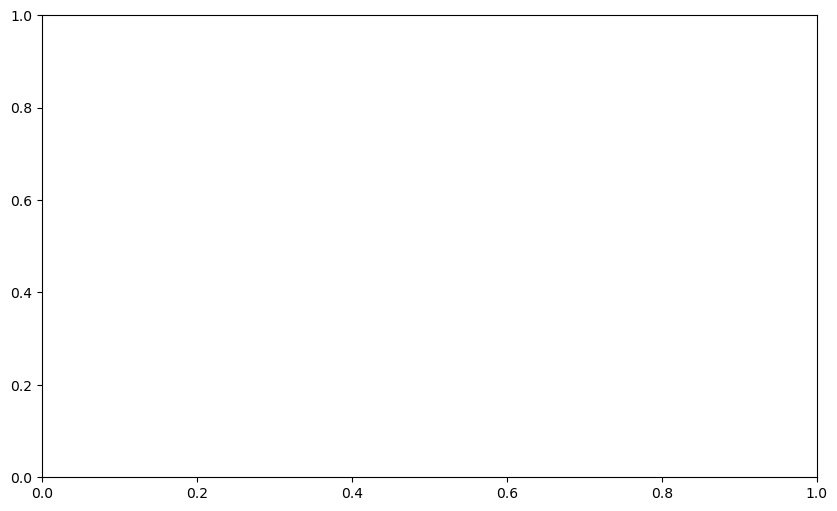

In [105]:
import matplotlib.pyplot as plt

# Calculate category counts
category_counts = df_business['categories'].str.split(', ').explode().value_counts().head(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10(range(len(category_counts)))  # Choose colors from a predefined colormap

# Plot the bar chart with customizations
category_counts.sort_values().plot(kind='barh', color=colors)
plt.title('Top 10 Categories of Businesses', fontsize=16, fontweight='bold')  # Set title with custom font size and weight
plt.xlabel('Count', fontsize=14)  # Set x-axis label with custom font size
plt.ylabel('Category', fontsize=14)  # Set y-axis label with custom font size
plt.xticks(fontsize=12)  # Set font size for x-axis tick labels
plt.yticks(fontsize=12)  # Set font size for y-axis tick labels
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines with custom style and transparency
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


The bar chart illustrates the distribution of businesses by category, revealing that restaurants constitute the largest proportion of opened businesses, followed by food-related establishments, shopping outlets, home services, and so forth.

In [ ]:
from wordcloud import WordCloud

# Remove commas from the categories data
categories_data = df_business['categories'].str.replace(',', '')

# Count the occurrences of each category
category_counts = categories_data.value_counts()

# Convert the category counts to a dictionary
category_dict = category_counts.to_dict()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(category_dict)

# Display the word cloud
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


The word cloud highlights prominent trends in the market, indicating that pizza and Chinese restaurants are particularly prevalent, with multiple occurrences. Similarly, beauty and spas emerge as dominant categories within the industry.

In [ ]:
df_business['state'].value_counts()

In [ ]:

city_counts = df_business['city'].value_counts().head(20)  # Example: showing top 20 cities

# Creating a bar plot
plt.figure(figsize=(14, 8))
city_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Businesses by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The bar chart depicts the distribution of businesses across different locations, with Philadelphia hosting the highest number of establishments, followed by Tucson and Tampa. Conversely, Meridian, St. Petersburg, and St. Louis exhibit the lowest counts of businesses.

In [ ]:

state_counts = df_business['state'].value_counts()

# Define full names for US states and Canadian provinces/territories
state_names = {
    'PA': 'Pennsylvania', 'FL': 'Florida', 'TN': 'Tennessee', 'IN': 'Indiana', 'MO': 'Missouri', 
    'AZ': 'Arizona', 'LA': 'Louisiana', 'NJ': 'New Jersey', 'NV': 'Nevada', 'CA': 'California', 
    'ID': 'Idaho', 'DE': 'Delaware', 'IL': 'Illinois', 'MA': 'Massachusetts', 'VI': 'Virgin Islands', 
    'VT': 'Vermont', 'AB': 'Alberta'  # Add more as needed
}

# Define colors for US states and Canadian provinces/territories
us_states = ['PA', 'FL', 'TN', 'IN', 'MO', 'AZ', 'LA', 'NJ', 'NV', 'CA', 'ID', 'DE', 'IL', 'MA', 'VI', 'VT']
us_state_color = 'skyblue'
canadian_provinces = ['AB']  # Add more Canadian provinces if needed
canadian_province_color = 'lightgreen'

# Create a bar plot
plt.figure(figsize=(14, 8))
for state, count in state_counts.items():
    if state in us_states:
        full_name = state_names[state]
        plt.bar(full_name, count, color=us_state_color)
    elif state in canadian_provinces:
        full_name = state_names[state]
        plt.bar(full_name, count, color=canadian_province_color)

plt.title('Count of Businesses by State/Province')
plt.xlabel('State/Province')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Upon examining the statewise distribution, it becomes evident that Pennsylvania, Florida, and Tennessee are the dominant regions, with notable business presence. Notably, Alberta represents the sole Canadian province included. Conversely, Delaware, Illinois, and Idaho exhibit comparatively fewer businesses

In [ ]:
df_business.iloc[0]

In [ ]:

# Sort the dataframe by star rating and review count
sorted_businesses = df_business.sort_values(by=['stars', 'review_count'], ascending=[False, False])

# Select the top 20 businesses
top_20_businesses = sorted_businesses.head(20)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Generate a color map
colors = plt.cm.viridis(np.linspace(0, 1, len(top_20_businesses)))

# Plotting
bars = ax.barh(top_20_businesses['name'], top_20_businesses['review_count'], color=colors)

# Adding labels and title
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Business Name', fontsize=14)
ax.set_title('Top 20 Businesses by Star Rating and Review Count', fontsize=16)

# Adding data labels
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, '{:,}'.format(int(width)), 
            va='center', ha='left', fontsize=12, color='black')

# Adding gridlines
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Removing spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Invert y-axis for better readability
ax.invert_yaxis()

# Tight layout
plt.tight_layout()

# Show plot
plt.show()


The bar chart, considering cumulative reviews and star ratings, reveals Blues City Deli as the top performer with 991 reviews, followed by Free Tours by Foot and Termerico"

In [ ]:
# Filter businesses located in Alberta with star rating greater than 4
alberta_businesses_filtered = alberta_businesses[(alberta_businesses['stars'] > 4)]

# Sort the filtered dataframe by review count and star rating
sorted_alberta_businesses_filtered = alberta_businesses_filtered.sort_values(by=['review_count', 'stars'], ascending=[False, False])

# Select the top 20 businesses
top_20_alberta_businesses_filtered = sorted_alberta_businesses_filtered.head(20)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Generate a color map
colors = plt.cm.viridis(np.linspace(0, 1, len(top_20_alberta_businesses_filtered)))

# Plotting
bars = ax.barh(top_20_alberta_businesses_filtered['name'], top_20_alberta_businesses_filtered['review_count'], color=colors)

# Adding labels and title
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Business Name', fontsize=14)
ax.set_title('Top 20 Businesses in Alberta by Star Rating (>4.5) and Review Count', fontsize=16)

# Adding data labels
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, '{:,}'.format(int(width)), 
            va='center', ha='left', fontsize=12, color='black')

# Adding gridlines
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Removing spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Invert y-axis for better readability
ax.invert_yaxis()

# Tight layout
plt.tight_layout()

# Show plot
plt.show()


Diving deeper into businesses in Alberta, filtering by rating greater than 4 and maximum number of reviews

In [ ]:

# Count the occurrences of each business name
name_counts = df_business['name'].value_counts()

# Filter businesses where the name occurs more than 5 times
chain_businesses = df_business[df_business['name'].isin(name_counts[name_counts > 5].index)]

# Display the filtered DataFrame
print(chain_businesses['name'])


In [ ]:
import matplotlib.pyplot as plt

# Filter businesses with a rating of 5
top_rated_businesses = df_business[df_business['stars'] >= 4.5]  # Adjust the rating threshold as needed

# Identify chains based on repeating names
chain_businesses = top_rated_businesses[top_rated_businesses['name'].duplicated(keep=False)]
chains = chain_businesses.groupby('name').filter(lambda x: len(x) > 3)

# Group by business name, calculate total review count and average star rating, and sort by combined metric
chain_performance = chains.groupby('name').agg({'review_count': 'sum', 'stars': 'mean'})
chain_performance['combined_metric'] = chain_performance['review_count'] * chain_performance['stars']
top_chains = chain_performance.sort_values(by='combined_metric', ascending=False).head(20)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Define custom bar colors
bar_colors = plt.cm.tab20c(range(len(top_chains)))

# Plotting
ax.barh(top_chains.index, top_chains['combined_metric'], color=bar_colors, edgecolor='black', linewidth=1.5)

# Adding shadows to the bars
for spine in ax.spines.values():
    spine.set_visible(False)

# Adding labels and title with custom styling
ax.set_xlabel('Combined Metric (Star Rating * Number of Reviews)', fontsize=14, fontweight='bold', color='black')
ax.set_ylabel('Chain Name', fontsize=14, fontweight='bold', color='black')
ax.set_title('Top 20 Chains with Maximum Combined Metric', fontsize=18, fontweight='bold', color='black')

# Customize tick labels
ax.tick_params(axis='both', which='major', labelsize=12, colors='black')

# Invert y-axis for better readability
ax.invert_yaxis()

# Display the plot with a tight layout
plt.tight_layout()
plt.show()


In [ ]:

chain_performance.head(20)

In [ ]:
import matplotlib.pyplot as plt

# Filter businesses with maximum review count and rating
top_businesses = df_business.sort_values(by=['review_count', 'stars'], ascending=[False, False])

# Select top 20 businesses
top_20_businesses = top_businesses.head(20)

# Visualize top 20 businesses
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting
ax.barh(top_20_businesses['name'], top_20_businesses['review_count'], color='skyblue')

# Adding labels and title
ax.set_xlabel('Total Review Count')
ax.set_ylabel('Business Name')
ax.set_title('Top 20 Businesses with Maximum Review Count and Highest Rating')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Identify small businesses (single-location) and large businesses (chains)
small_businesses = df_business[df_business['name'].duplicated(keep=False)].drop_duplicates(subset=['name'], keep=False)
large_businesses = df_business[df_business['name'].duplicated(keep=False)].drop_duplicates(subset=['name'], keep='first')

# Count the number of locations for each chain
chain_counts = df_business['name'].value_counts()

# Filter large businesses (chains) with more than three locations
large_businesses = large_businesses[large_businesses['name'].map(chain_counts) > 3]

# Get the counts of small and large businesses
count_small_businesses = len(small_businesses)
count_large_businesses = len(large_businesses)

print("Number of small businesses (single-location):", count_small_businesses)
print("Number of large businesses (chains with more than 3 locations):", count_large_businesses)


In [ ]:

# Count the number of locations for each chain
chain_counts = df_business['name'].value_counts()
chain_counts

In [ ]:
# Filter small businesses (single-location or with name repeating max twice or thrice)
small_businesses = df_business[df_business['name'].duplicated(keep=False)].drop_duplicates(subset=['name'], keep=False)
small_businesses_count = len(small_businesses)
max_name_repeats = 3

# Identify small businesses with name repeating max twice or thrice
small_businesses_max_repeat = df_business[df_business['name'].duplicated(keep=False)]
small_businesses_max_repeat_count = len(small_businesses_max_repeat['name'].unique())

# Filter large businesses (chains) with more than three locations
large_businesses = df_business[df_business['name'].duplicated(keep=False)].drop_duplicates(subset=['name'], keep='first')
chain_counts = df_business['name'].value_counts()
large_businesses = large_businesses[large_businesses['name'].map(chain_counts) > max_name_repeats]
large_businesses_count = len(large_businesses)

print("Number of small businesses (single-location or name repeating max twice or thrice):", small_businesses_count + small_businesses_max_repeat_count)
print("Number of large businesses (chains with more than", max_name_repeats, "locations):", large_businesses_count)


In [ ]:
import matplotlib.pyplot as plt

# Define the counts and categories
counts = [small_businesses_count + small_businesses_max_repeat_count, large_businesses_count]
categories = ['Small Businesses (Less than 3 stores)', 'Large Businesses (>3 stores)']

# Define colors
colors = ['#1f77b4', '#ff7f0e']

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=colors)

# Add data labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom', color='black', fontsize=12)

# Add title and labels
plt.title('Comparison of Small and Large Businesses')
plt.xlabel('Category')
plt.ylabel('Count')

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Calculate total review count for small businesses
total_reviews_small = df_business[df_business['name'].duplicated(keep=False) & 
                                  ~df_business['name'].duplicated(keep='first')]['review_count'].sum()

# Calculate total review count for large businesses
total_reviews_large = df_business[df_business['name'].duplicated(keep=False) & 
                                  df_business['name'].duplicated(keep='first')]['review_count'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(['Small Businesses', 'Large Businesses'], [total_reviews_small, total_reviews_large], color=['skyblue', 'salmon'])

# Add labels and title
plt.xlabel('Business Size')
plt.ylabel('Total Reviews Received')
plt.title('Total Reviews Received by Small vs Large Businesses')

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Calculate total review count for small businesses based on star rating
total_reviews_small_rating = df_business[df_business['name'].duplicated(keep=False) & 
                                         ~df_business['name'].duplicated(keep='first')].groupby('stars')['review_count'].sum()

# Calculate total review count for large businesses based on star rating
total_reviews_large_rating = df_business[df_business['name'].duplicated(keep=False) & 
                                         df_business['name'].duplicated(keep='first')].groupby('stars')['review_count'].sum()

# Create a bar plot for small businesses
plt.figure(figsize=(10, 6))
plt.bar(total_reviews_small_rating.index - 0.1, total_reviews_small_rating.values, width=0.2, label='Small Businesses', color='skyblue')

# Create a bar plot for large businesses
plt.bar(total_reviews_large_rating.index + 0.1, total_reviews_large_rating.values, width=0.2, label='Large Businesses', color='salmon')

# Add labels and title
plt.xlabel('Star Rating')
plt.ylabel('Total Reviews Received')
plt.title('Total Reviews Received by Small vs Large Businesses based on Star Rating')
plt.xticks(total_reviews_small_rating.index)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Get the top 20 small businesses
top_20_small_businesses = df_business[df_business['name'].duplicated(keep=False) & 
                                      ~df_business['name'].duplicated(keep='first')].nlargest(20, 'review_count')

# Get the top 20 large businesses
top_20_large_businesses = df_business[df_business['name'].duplicated(keep=False) & 
                                      df_business['name'].duplicated(keep='first')].nlargest(20, 'review_count')

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot for top 20 small businesses
axs[0].barh(top_20_small_businesses['name'], top_20_small_businesses['review_count'], color='skyblue', label='Review Count')
axs[0].barh(top_20_small_businesses['name'], top_20_small_businesses['stars'], color='salmon', label='Star Rating')
axs[0].set_xlabel('Count')
axs[0].set_title('Top 20 Small Businesses')

# Plot for top 20 large businesses
axs[1].barh(top_20_large_businesses['name'], top_20_large_businesses['review_count'], color='skyblue', label='Review Count')
axs[1].barh(top_20_large_businesses['name'], top_20_large_businesses['stars'], color='salmon', label='Star Rating')
axs[1].set_xlabel('Count')
axs[1].set_title('Top 20 Large Businesses')

# Add legends
axs[0].legend()
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the top 20 small businesses
top_20_small_businesses = df_business[df_business['name'].duplicated(keep=False) & 
                                      ~df_business['name'].duplicated(keep='first')].nlargest(20, 'review_count')

# Get the top 20 large businesses
top_20_large_businesses = df_business[df_business['name'].duplicated(keep=False) & 
                                      df_business['name'].duplicated(keep='first')].nlargest(20, 'review_count')

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
x = np.arange(len(top_20_small_businesses))

# Plot the bars for small businesses
bars1 = ax.bar(x - bar_width/2, top_20_small_businesses['review_count'], bar_width, color='skyblue', label='Small Business')
bars2 = ax.bar(x + bar_width/2, top_20_large_businesses['review_count'], bar_width, color='salmon', label='Large Business')

# Add labels, title, and legend
ax.set_xlabel('Businesses')
ax.set_ylabel('Review Count')
ax.set_title('Comparison of Ratings and Reviews: Small vs Large Businesses')
ax.set_xticks(x)
ax.set_xticklabels(top_20_small_businesses['name'], rotation=90)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the top 20 small businesses
top_20_small_businesses = df_business[df_business['name'].duplicated(keep=False) & 
                                      ~df_business['name'].duplicated(keep='first')].nlargest(20, 'review_count')

# Get the top 20 large businesses
top_20_large_businesses = df_business[df_business['name'].duplicated(keep=False) & 
                                      df_business['name'].duplicated(keep='first')].nlargest(20, 'review_count')

# Concatenate names of both sets of businesses
business_names = np.concatenate((top_20_small_businesses['name'], top_20_large_businesses['name']))

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
x = np.arange(len(business_names))

# Plot the bars for small businesses
bars1 = ax.bar(x[:len(top_20_small_businesses)], top_20_small_businesses['review_count'], bar_width, color='skyblue', label='Small Business')

# Plot the bars for large businesses
bars2 = ax.bar(x[len(top_20_small_businesses):], top_20_large_businesses['review_count'], bar_width, color='salmon', label='Large Business')

# Add labels, title, and legend
ax.set_xlabel('Businesses')
ax.set_ylabel('Review Count')
ax.set_title('Comparison of Ratings and Reviews: Small vs Large Businesses')
ax.set_xticks(x)
ax.set_xticklabels(business_names, rotation=90)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
df_business.info()

In [ ]:
df_business.iloc[0]

In [ ]:
df_business.head()

In [ ]:
import matplotlib.pyplot as plt

# Select only columns of type 'number'
numeric_columns = df_business.select_dtypes(include=['number']).columns

# Select the first 10 numeric columns
numeric_columns_subset = numeric_columns[:5]

# Create subplots
num_plots = len(numeric_columns_subset)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(4, 3 * num_plots))

# Plot histograms for each numeric column
for i, column in enumerate(numeric_columns_subset):
    ax = axes[i]
    ax.hist(df_business[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Assuming df_business is your DataFrame containing numeric columns
numeric_columns = df_business.select_dtypes(include=['number', 'float'])

# Lets get the correlation matrix and save to variable 'corr_mat'
corr_mat = numeric_columns.corr()

# Display corr_mat
corr_mat

In [ ]:
plt.figure(figsize=(10, 7))

# Selecting first 10 features
corr_mat_subset = corr_mat.iloc[:10, :10]

# Creating mask of duplicated combinations
mask = np.triu(np.ones_like(corr_mat_subset, dtype=bool))

# Plotting heatmap
sns.heatmap(corr_mat_subset, mask=mask, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)

plt.show()


We dont see any correlation in the matrix between latitude, longitude, stars, review count or is open. As the coefficients are close to zero, it indicates little to no correlation between these variables.

In [ ]:
small_businesses.shape

In [ ]:
df_business=small_businesses.copy()

In [ ]:
df_business.dtypes

In [ ]:
df_business.drop(columns='name',inplace=True)


In [ ]:
# Create dummy variables for the 'name' column
#name_dummies = pd.get_dummies(df_business['name'])

# Concatenate the dummy variables with the original DataFrame
#df_with_dummies = pd.concat([df_business, name_dummies], axis=1)

# Display the DataFrame with dummy variables
#print(df_with_dummies.head())

In [ ]:
df_business.dtypes

In [ ]:
df_business = pd.merge(df_business, hours_day_df, on='business_id', how='inner')

In [ ]:
hours_day_df.head()

In [ ]:
#dropping all irrelevant columns that we have already converted
df_business.drop(columns=['business_id','attributes','categories','postal_code'],inplace=True)

In [ ]:
df_business.dtypes

In [ ]:
df_business['is_open'].value_counts()

### One Hot Encoding

In [ ]:
# Perform one-hot encoding on the 'city' column
city_encoded = pd.get_dummies(df_business['city'], prefix='city')

# Concatenate the one-hot encoded DataFrame with the original DataFrame
city_df_encoded = pd.concat([df_business.drop(columns=['city']), city_encoded], axis=1)


### Modelling

In [ ]:

y = df_business['is_open']  # Target variable
X = df_business.drop(columns=['is_open'])  # Features (excluding 'is_open')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#a bunch of imports!
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm

# Ignore futurewarnings
import warnings
warnings.filterwarnings('ignore')


# Split the data into train &  test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

#scale
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

#decompose
pca = PCA(n_components=3)
pca.fit(X_train)
X_train = pca.transform(X_train)

#fit
rbf_svc = svm.SVC(kernel='rbf')
model = rbf_svc.fit(X_train, y_train)

print(model.score(X_train, y_train))


Modelling 
Logistic Regression:

Logistic Regression can serve as the foundational model for binary classification, where it can learn to predict the probability of a business being open or closed. It can dynamically adjust class weights or employ regularization techniques to ensure robust performance, particularly in handling imbalanced classes.

Decision Tree:

Decision trees can be instrumental in providing interpretable insights into the underlying data patterns. By recursively partitioning the feature space, they will uncover significant predictors of business openness. Techniques such as pruning will be applied to prevent overfitting, ensuring the generalization of the model to unseen data while maintaining transparency in decision-making.

XGBoost:

XGBoost plays a pivotal role as a sophisticated ensemble learning algorithm, capable of capturing complex relationships within the data. It can be extensively fine-tuned, optimizing hyperparameters like scale_pos_weight to effectively handle class imbalance. Through iterative training, XGBoost will strive to achieve superior predictive accuracy and resilience to imbalanced data distributions.

Handling Imbalance in 'is_open' Target Variable:

For imbalanced classification of 'is_open', where one class (e.g., open businesses) may be significantly more prevalent than the other (e.g., closed businesses), several strategies can be applied: Resampling Techniques: Use techniques like oversampling (e.g., SMOTE), undersampling, or a combination of both to balance the class distribution.
Algorithmic Approaches: Algorithms like XGBoost, decision trees, and random forests often provide parameters to adjust class weights or explicitly handle class imbalance.
Ensemble Methods: Ensemble techniques like bagging and boosting can help improve the model's performance on imbalanced data by combining predictions from multiple models trained on balanced subsets.
Evaluation Metrics: Instead of accuracy, consider using evaluation metrics like precision, recall, F1-score, or area under the ROC curve (ROC-AUC) to assess the model's performance, especially in the context of class imbalance.

To be Continued...